In [1]:
!pip install pycountry_convert --quiet

## Import Statements

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime as dt
import pycountry_convert as pc
import os
%matplotlib inline
        

## List Data

In [3]:
raw_df = pd.read_csv('/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/raw_data.csv')
df = pd.read_csv('/kaggle/input/impact-of-covid19-pandemic-on-the-global-economy/transformed_data.csv')

raw_df.drop('Unnamed: 9', inplace=True, axis=1)
raw_df.drop('Unnamed: 10', inplace=True, axis=1)
raw_df.drop('Unnamed: 11', inplace=True, axis=1)
raw_df.drop('Unnamed: 12', inplace=True, axis=1)
raw_df.drop('Unnamed: 13', inplace=True, axis=1)

#raw_df.rename(columns={"Unnamed: 12": "_population", "Unnamed: 13": "_gdp_per_capita"}, inplace=True)

raw_df.head(10)

,iso_code,location,date,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498
5,AFG,Afghanistan,2020-01-05,0.0,0.0,0.0,38928341,1803.987,0.498
6,AFG,Afghanistan,2020-01-06,0.0,0.0,0.0,38928341,1803.987,0.498
7,AFG,Afghanistan,2020-01-07,0.0,0.0,0.0,38928341,1803.987,0.498
8,AFG,Afghanistan,2020-01-08,0.0,0.0,0.0,38928341,1803.987,0.498
9,AFG,Afghanistan,2020-01-09,0.0,0.0,0.0,38928341,1803.987,0.498


In [4]:
raw_df.describe()

,total_cases,total_deaths,stringency_index,population,gdp_per_capita,human_development_index
count,4.732400e+04,39228.000000,43292.000000,5.041800e+04,44706.000000,44216.000000
mean,6.621927e+04,2978.767819,56.162022,4.251601e+07,20818.706240,0.720139
std,4.045582e+05,13836.644013,27.532685,1.564607e+08,20441.365392,0.160902
min,0.000000e+00,0.000000,0.000000,8.090000e+02,661.240000,0.000000
25%,1.260000e+02,10.000000,37.960000,1.399491e+06,5338.454000,0.601000
50%,1.594000e+03,64.000000,61.110000,8.278737e+06,13913.839000,0.752000
75%,1.584775e+04,564.000000,78.700000,2.913681e+07,31400.840000,0.847000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


In [5]:
print('\n', raw_df.isna().sum())
print('\n', df.isna().sum())

df = df.replace(to_replace = np.nan, value = 0) 
raw_df = raw_df.replace(to_replace = np.nan, value = 0) 


 iso_code                       0
location                       0
date                           0
total_cases                 3094
total_deaths               11190
stringency_index            7126
population                     0
gdp_per_capita              5712
human_development_index     6202
dtype: int64

 CODE          0
COUNTRY       0
DATE          0
HDI        6202
TC            0
TD            0
STI           0
POP           0
GDPCAP        0
dtype: int64


In [6]:
population = raw_df.population
gdp_capita = raw_df.gdp_per_capita
p = df["POP"].copy()
g = df["GDPCAP"].copy()
df["population"] = population
df["gdp_cap"] = gdp_capita

df["DATE"] = df["DATE"].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
df["year"] = df["DATE"].map(lambda x: x.year)
df["month"] = df["DATE"].map(lambda x: x.month)

df = df[['CODE', 'COUNTRY', 'year', 'month', 'DATE', 'population', 'gdp_cap', 'HDI', 'TC', 'TD', 'STI']]
df = df.rename(columns={'CODE':'Code', 'COUNTRY':'Country', 'year':'Year', 'month':'Month', 'DATE':'Date', 'population':'Population', 'gdp_cap':'GDP_Cap', 'HDI':'HDI', 'TC':'Cases', 'TD':'Deaths', 'STI':'Stringency_Index'})
df.head()

,Code,Country,Year,Month,Date,Population,GDP_Cap,HDI,Cases,Deaths,Stringency_Index
0,AFG,Afghanistan,2019,12,2019-12-31,38928341,1803.987,0.498,0.0,0.0,0.0
1,AFG,Afghanistan,2020,1,2020-01-01,38928341,1803.987,0.498,0.0,0.0,0.0
2,AFG,Afghanistan,2020,1,2020-01-02,38928341,1803.987,0.498,0.0,0.0,0.0
3,AFG,Afghanistan,2020,1,2020-01-03,38928341,1803.987,0.498,0.0,0.0,0.0
4,AFG,Afghanistan,2020,1,2020-01-04,38928341,1803.987,0.498,0.0,0.0,0.0


## Visualize Data

In [7]:
df = df[df.Country != 'Kosovo']

country = df.Country.unique().tolist()
country_code = df.Code.unique().tolist()
pop_world = df.Population.unique().tolist()
hdi_world = []
gdp_world = []
cases_country = []
death_country = []
stringency_index = []

for i in country:
    hdi_world.append((df.loc[df.Country == i, 'HDI']).sum()/294)
    gdp_world.append(df.loc[df.Country == i, 'GDP_Cap'].sum()/294)
    stringency_index.append(df.loc[df.Country == i, 'Stringency_Index'].sum()/294)
    cases_country.append(df.loc[(df["Country"] == i), "Cases"].sum())
    death_country.append(df.loc[(df["Country"] == i), "Deaths"].sum())

In [8]:
alpha2_code = []
for i in country_code:
    alpha2_code.append(pc.country_alpha3_to_country_alpha2(i))
continent_code = []
for i in alpha2_code:
    try:
        continent_code.append(pc.country_alpha2_to_continent_code(i))
    except:
        continent_code.append('Unknown') 

data_agg = pd.DataFrame(list(zip(country_code, country, pop_world, cases_country, death_country, hdi_world, gdp_world, stringency_index, continent_code)), columns =['Code', 'Country', 'Population', 'Cases', 'Deaths', 'HDI', 'GDP_Cap','Stringency_Index', 'Continent']) 
data_agg = data_agg.replace({'AF':'Africa', 'AN':'Antarctica', 'AS':'Asia', 'EU':'Europe', 'NA':'North America', 'OC':'Oceania', 'SA':'South America'})
data_agg = data_agg.round(2)

data_agg.head()

,Code,Country,Population,Cases,Deaths,HDI,GDP_Cap,Stringency_Index,Continent
0,AFG,Afghanistan,38928341,2000.65,1226.95,0.50,1803.99,3.05,Asia
1,ALB,Albania,2877800,1702.24,929.37,0.60,9033.24,3.01,Europe
2,DZA,Algeria,43851043,2052.51,1406.22,0.75,13913.84,3.20,Africa
3,AND,Andorra,77265,1465.83,786.66,0.66,0.00,2.68,Europe
4,AGO,Angola,32866268,1203.98,590.14,0.42,4196.37,2.97,Africa


In [9]:
fig = px.scatter(data_agg, x="HDI", y="GDP_Cap", size="Population", hover_name="Country", color='Continent', template='simple_white', size_max=50)
fig.update_layout(
    height=500,
    title_text="Comparison between a Country's GDP per Capita and HDI"
)
fig.show()

Text(0.5, 1.0, 'Relation between HDI and GDP per capita')

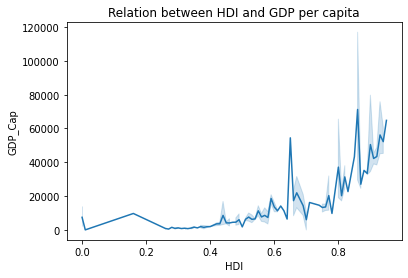

In [10]:
sns.lineplot(data=data_agg[['HDI', 'GDP_Cap']], x="HDI", y="GDP_Cap").set_title('Relation between HDI and GDP per capita')

In [11]:
fig = px.scatter(data_agg, x="GDP_Cap", y="Cases", size="Population", hover_name="Country", color='Continent', template='simple_white', size_max=50)
fig.update_layout(
    height=500,
    title_text="COVID-19 Cases vs GDP per Capita (per Country)"
)
fig.show()

Text(0.5, 1.0, 'Relation between HDI and Covid-19 cases')

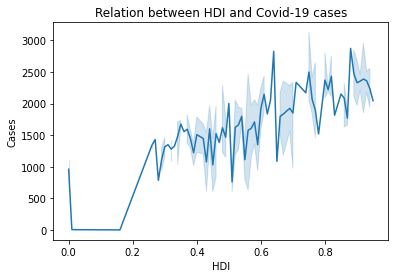

In [12]:
sns.lineplot(data=data_agg[['HDI', 'Cases']], x="HDI", y="Cases").set_title('Relation between HDI and Covid-19 cases')

In [13]:
fig = px.scatter(data_agg, x='HDI', y='Cases', hover_name='Country', color='Continent', size='Population', template="simple_white", size_max=50)
fig.update_traces(textposition='top center')
fig.update_layout(
    height=500,
    title_text='COVID-19 Cases vs HDI (per Country)'
)
fig.show()

In [14]:
fig = px.bar(data_agg, x='Continent', y='Cases', hover_name='Country', color='Continent', template="simple_white")
fig.update_layout(
    height=500,
    title_text='COVID-19 Cases per Continent'
)
fig.update_xaxes(showticklabels=False)
fig.show()

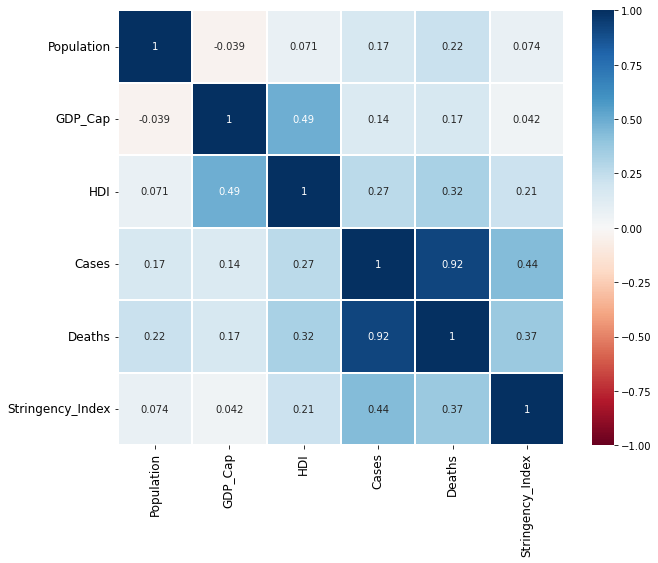

In [15]:
cor = df[['Population', 'GDP_Cap', 'HDI', 'Cases', 'Deaths', 'Stringency_Index']].corr()
sns.heatmap(cor, annot=True, linewidths=0.2, cmap="RdBu", vmin=-1, vmax=1)
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

In [16]:
raw_df["date"] = raw_df["date"].map(lambda x: dt.strptime(x, '%Y-%m-%d'))
raw_df["year"] = raw_df["date"].map(lambda x: x.year)
raw_df["month"] = raw_df["date"].map(lambda x: x.month)

In [17]:
fig = px.line(raw_df, x="date", y="total_deaths", color="location", 
              title='Total deaths till Oct 2020',
              template="simple_white")
fig.show()

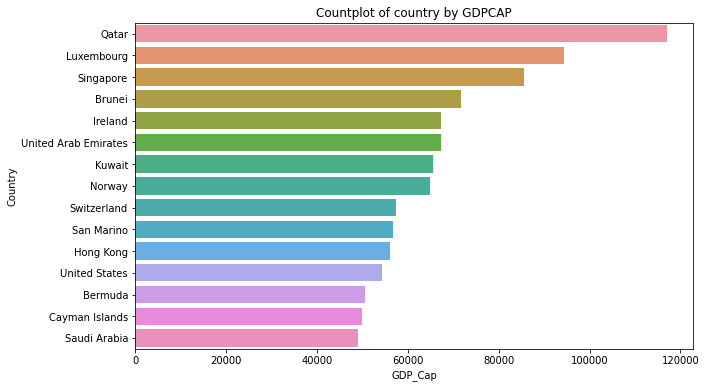

In [18]:
gdp = df.sort_values(by='GDP_Cap', ascending=False)[:3800]
figure = plt.figure(figsize=(10,6))
sns.barplot(y=gdp.Country, x=gdp.GDP_Cap)
plt.xticks()
plt.xlabel('GDP_Cap')
plt.ylabel('Country')
plt.title('Countplot of country by GDPCAP')
plt.show()

## Train Data

In [19]:
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split

train_df = df.copy()

train_df['Date'] = train_df['Date'].map(lambda x: x.toordinal() - 737423)
#train_df['Date'] = (train_df['Date']+1-train_df['Date'].min())/(train_df['Date'].max()-train_df['Date'].min())
train_df['Population'] = p
train_df['GDP_Cap'] = g
train_df['Country'] = pd.factorize(train_df['Country'])[0]

X = train_df[['Country', 'Date', 'Population', 'GDP_Cap', 'HDI', 'Stringency_Index']]
y = train_df['Cases']

X.shape, y.shape

((50198, 6), (50198,))

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

print('Train size -', X_train.shape, y_train.shape)
print('Test size -', X_test.shape, y_test.shape)

Train size - (37648, 6) (37648,)
Test size - (12550, 6) (12550,)


In [21]:
from sklearn import svm, metrics, tree, linear_model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.metrics import mean_squared_error, r2_score, max_error

### Support Vector Regression

In [22]:
svr_regressor = svm.SVR().fit(X_train, y_train)

pred = svr_regressor.predict(X_test)
mse1 = mean_squared_error(y_test, pred)
r21 = r2_score(y_test, pred)
max1 = max_error(y_test, pred)

print('Mean Squared Error -', mse1)
print('R2 Score -', r21)
print('Maxx Error -', max1)

Mean Squared Error - 3.803929093124806
R2 Score - 0.7082921937869276
Maxx Error - 10.333010622765938


### Decision Tree Regressor

In [23]:
decision_tree_regressor = tree.DecisionTreeRegressor().fit(X_train, y_train)

pred = decision_tree_regressor.predict(X_test)
mse2 = mean_squared_error(y_test, pred)
r22 = r2_score(y_test, pred)
max2 = max_error(y_test, pred)

print('Mean Squared Error -', mse2)
print('R2 Score -', r22)
print('Max Error -', max2)

Mean Squared Error - 0.08019358331956311
R2 Score - 0.9938502811987754
Max Error - 6.324757131


### Linear Regressor

In [24]:
logistic_regressor = LinearRegression().fit(X_train, y_train)

pred = logistic_regressor.predict(X_test)
mse3 = mean_squared_error(y_test, pred)
r23 = r2_score(y_test, pred)
max3 = max_error(y_test, pred)

print('Mean Squared Error -', mse3)
print('R2 Score -', r23)
print('Max Error -', max3)

Mean Squared Error - 4.630487718712038
R2 Score - 0.6449067842606748
Max Error - 11.475236956620797


### Bayesian Regression

In [25]:
b_regressor = linear_model.BayesianRidge().fit(X_train, y_train)

pred = b_regressor.predict(X_test)
mse4 = mean_squared_error(y_test, pred)
r24 = r2_score(y_test, pred)
max4= max_error(y_test, pred)

print('Mean Squared Error -', mse4)
print('R2 Score -', r24)
print('Max Error -', max4)

Mean Squared Error - 4.6303473262914014
R2 Score - 0.6449175503827633
Max Error - 11.473505861699174
